# Sequence Prediction Architectures in Machine Learning

## Table of Contents
1. [Introduction](#introduction)
2. [Theoretical Background](#theoretical-background)
3. [Implementation](#implementation)
4. [Experiments and Results](#experiments)
5. [Practical Applications](#applications)
6. [References](#references)

## Introduction <a name="introduction"></a>

This notebook provides a comprehensive exploration of different sequence prediction architectures in machine learning. We'll cover four main approaches:

1. Left-to-right Autoregressive Prediction
2. Left-to-right Markov Chain
3. Independent Prediction
4. Bidirectional Prediction

Each approach has its unique characteristics, advantages, and limitations, which we'll explore through theory and practical implementation.

## Theoretical Background <a name="theoretical-background"></a>

### 1. Left-to-right Autoregressive Prediction
- Formula: P(X) = ∏|X|ᵢ₌₁ P(xᵢ|x₁,...,xᵢ₋₁)
- Examples: GPT models, Traditional RNNs
- Complexity: O(n) for generation
- Key feature: Models text like human reading pattern

### 2. Left-to-right Markov Chain
- Formula: P(X) = ∏|X|ᵢ₌₁ P(xᵢ|xᵢ₋ₙ₊₁,...,xᵢ₋₁)
- Examples: n-gram Models, Feed-forward LMs
- Complexity: O(1) per token with fixed window
- Key feature: Limited context window for efficiency

### 3. Independent Prediction
- Formula: P(X) = ∏|X|ᵢ₌₁ P(xᵢ)
- Examples: Unigram Models, BoW models
- Complexity: O(1) per token
- Key feature: Context-free predictions

### 4. Bidirectional Prediction
- Formula: P(X) ≠ ∏|X|ᵢ₌₁ P(xᵢ|x≠ᵢ)
- Examples: BERT, RoBERTa
- Complexity: O(n) for attention
- Key feature: Uses both past and future context

## Implementation <a name="implementation"></a>

We'll implement each architecture using PyTorch and demonstrate their usage. Key components:

1. Model Architecture
2. Training Process
3. Inference
4. Visualization Tools

## Experiments and Results <a name="experiments"></a>

We'll conduct experiments to compare:
1. Prediction accuracy
2. Computational efficiency
3. Context utilization
4. Memory requirements

## Practical Applications <a name="applications"></a>

Real-world applications for each architecture:

### Autoregressive Models
- Text generation
- Code completion
- Music generation
- Speech synthesis

### Markov Chain Models
- Simple chatbots
- Weather prediction
- Financial forecasting
- Game AI

### Independent Prediction
- Classification tasks
- Sentiment analysis
- Spam detection
- Image labeling

### Bidirectional Models
- Question answering
- Document understanding
- Information extraction
- Language translation

## References <a name="references"></a>

1. Vaswani, A., et al. (2017). "Attention Is All You Need." NeurIPS.
2. Brown, T., et al. (2020). "Language Models are Few-Shot Learners." NeurIPS.
3. Bengio, Y., et al. (2003). "Neural Probabilistic Language Models." JMLR.
4. Devlin, J., et al. (2019). "BERT: Pre-training of Deep Bidirectional Transformers." NAACL.
5. Radford, A., et al. (2018). "Improving Language Understanding by Generative Pre-Training." OpenAI.

## Usage Instructions

1. Open this notebook in Google Colab
2. Run all cells sequentially
3. Experiment with different parameters and models
4. Visualize results using provided functions

## License
MIT License - Feel free to use and modify with attribution.

## Author
Mohammed HAMDAN  
AIML - Step2wards Generative AI

In [4]:

## Install Required Dependencies
#!pip install torch transformers datasets matplotlib seaborn plotly


In [8]:

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from transformers import GPT2LMHeadModel, GPT2Tokenizer, BertModel, BertTokenizer, BertForMaskedLM
import plotly.graph_objects as go
from datasets import load_dataset
import pandas as pd

In [9]:

## Set Random Seed for Reproducibility
torch.manual_seed(42)
np.random.seed(42)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).



Prediction Examples:
original_text: The quick brown fox jumps over the lazy

autoregressive_completion: The quick brown fox jumps over the lazy white fox.

"I'm sorry, but I

bidirectional_filling: took



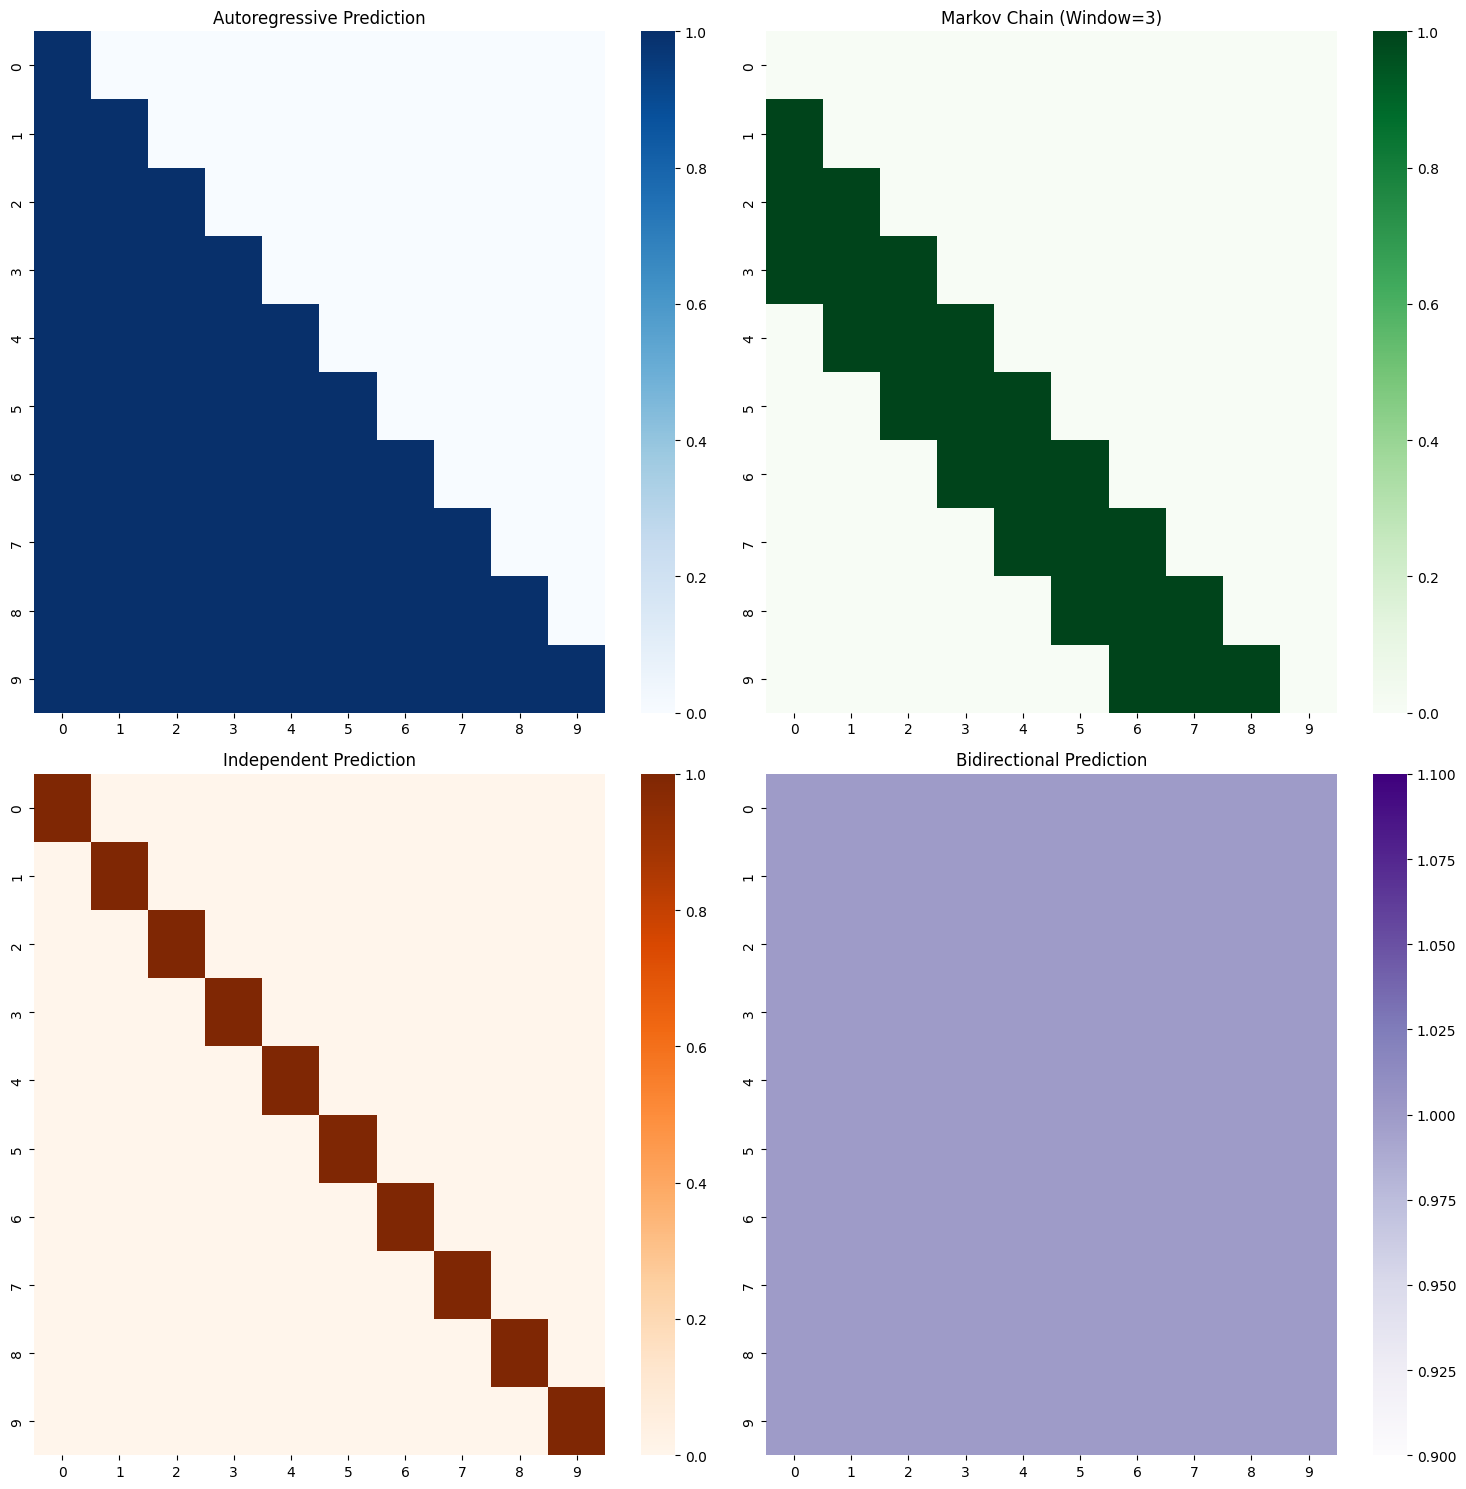

In [11]:
# AutoRegressive
class SimpleAutoregressiveModel(nn.Module):
    """Left-to-right autoregressive prediction model"""
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        lstm_out, _ = self.lstm(x)
        return self.fc(lstm_out)

class MarkovChainModel(nn.Module):
    """Left-to-right Markov chain model with fixed context window"""
    def __init__(self, vocab_size, embedding_dim, window_size):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim * window_size, embedding_dim)
        self.fc2 = nn.Linear(embedding_dim, vocab_size)
        self.window_size = window_size

    def forward(self, x):
        x = self.embedding(x)
        batch_size, seq_len, emb_dim = x.shape

        # Create sliding windows
        windows = []
        for i in range(self.window_size, seq_len):
            window = x[:, i-self.window_size:i, :].reshape(batch_size, -1)
            windows.append(window)

        x = torch.stack(windows, dim=1)
        x = self.fc1(x)
        return self.fc2(x)

class IndependentPredictionModel(nn.Module):
    """Independent token prediction model"""
    def __init__(self, vocab_size, hidden_dim):
        super().__init__()
        self.fc = nn.Linear(vocab_size, hidden_dim)
        self.output = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        x = self.fc(x)
        return self.output(x)

def visualize_attention_patterns():
    """Visualize different prediction patterns"""
    # Create sample attention patterns
    seq_len = 10

    # Autoregressive pattern
    autoregressive = np.tril(np.ones((seq_len, seq_len)))

    # Markov chain pattern (window size 3)
    markov = np.zeros((seq_len, seq_len))
    for i in range(seq_len):
        for j in range(max(0, i-3), i):
            markov[i,j] = 1

    # Independent pattern
    independent = np.eye(seq_len)

    # Bidirectional pattern
    bidirectional = np.ones((seq_len, seq_len))

    # Plot patterns
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))

    sns.heatmap(autoregressive, ax=axes[0,0], cmap='Blues')
    axes[0,0].set_title('Autoregressive Prediction')

    sns.heatmap(markov, ax=axes[0,1], cmap='Greens')
    axes[0,1].set_title('Markov Chain (Window=3)')

    sns.heatmap(independent, ax=axes[1,0], cmap='Oranges')
    axes[1,0].set_title('Independent Prediction')

    sns.heatmap(bidirectional, ax=axes[1,1], cmap='Purples')
    axes[1,1].set_title('Bidirectional Prediction')

    plt.tight_layout()
    return fig

def demonstrate_prediction_types():
    """Demonstrate different prediction types with real examples"""
    # Load tokenizers
    gpt2_tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
    bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    # Example text
    text = "The quick brown fox jumps over the lazy"
    masked_text = "The quick brown fox [MASK] over the lazy dog"  # Define masked_text

    # 1. Autoregressive (GPT-2)
    gpt2_model = GPT2LMHeadModel.from_pretrained('gpt2')
    inputs = gpt2_tokenizer(text, return_tensors="pt")
    outputs = gpt2_model.generate(**inputs, max_length=20, num_beams=5, no_repeat_ngram_size=2)
    ar_prediction = gpt2_tokenizer.decode(outputs[0], skip_special_tokens=True)

    # 2. Bidirectional (BERT for Masked LM)
    bert_model = BertForMaskedLM.from_pretrained('bert-base-uncased')

    inputs = bert_tokenizer(masked_text, return_tensors="pt")
    outputs = bert_model(**inputs)

    # Get logits (predicted token scores)
    logits = outputs.logits  # shape: [batch_size, seq_len, vocab_size]

    # Find the index of the [MASK] token
    mask_token_index = (inputs.input_ids == bert_tokenizer.mask_token_id).nonzero(as_tuple=True)[1]

    # Get the most likely token for the [MASK] position
    predicted_token_id = logits[0, mask_token_index].argmax(dim=-1)

    # Decode to get the predicted word
    bd_prediction = bert_tokenizer.decode(predicted_token_id)

    return {
        'original_text': text,
        'autoregressive_completion': ar_prediction,
        'bidirectional_filling': bd_prediction
    }

def complexity_analysis():
    """Analyze and visualize computational complexity"""
    sequence_lengths = np.arange(10, 1000, 50)

    # Theoretical complexity
    ar_complexity = sequence_lengths  # O(n)
    markov_complexity = np.ones_like(sequence_lengths) * 10  # O(1) with window size 10
    independent_complexity = np.ones_like(sequence_lengths)  # O(1)
    bidirectional_complexity = sequence_lengths  # O(n)

    # Create interactive plot
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=sequence_lengths, y=ar_complexity,
                            mode='lines', name='Autoregressive'))
    fig.add_trace(go.Scatter(x=sequence_lengths, y=markov_complexity,
                            mode='lines', name='Markov Chain'))
    fig.add_trace(go.Scatter(x=sequence_lengths, y=independent_complexity,
                            mode='lines', name='Independent'))
    fig.add_trace(go.Scatter(x=sequence_lengths, y=bidirectional_complexity,
                            mode='lines', name='Bidirectional'))

    fig.update_layout(title='Computational Complexity vs Sequence Length',
                     xaxis_title='Sequence Length',
                     yaxis_title='Relative Computation Time')

    return fig

# Main execution and demonstrations
if __name__ == "__main__":
    # 1. Visualize attention patterns
    attention_fig = visualize_attention_patterns()
    attention_fig.savefig('attention_patterns.png')

    # 2. Demonstrate predictions
    predictions = demonstrate_prediction_types()
    print("\nPrediction Examples:")
    for k, v in predictions.items():
        print(f"{k}: {v}\n")

    # 3. Analyze complexity
    complexity_fig = complexity_analysis()
    complexity_fig.write_html('complexity_analysis.html')